In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df_datos = pd.read_csv('./../Datos/VW_VOTARON_2020PLEB_Datos completos.csv',delimiter=';')

In [163]:
df_datos.head(2)

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron
0,0,Coyhaique,Coyhaique,0,22,chilena,Chile,Chile,[130] FEDERACION REGIONALISTA VERDE SOCIAL,Coyhaique,20-24,De Aysen Del General Carlos Ibañez Del Campo,femenino,sufragó,Nacional,1,1.0
1,0,El Puerto,Valparaiso,0,89,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,femenino,no sufragó,Nacional,1,NaN


* Como se compone el padrón electoral de la votación? cuál es el rango etario, afiliación politica?
* Cuál fue la participación por región respecto del padrón electoral?
* Cuál fue la participación por partido en la votación respecto del padrón electoral?
* Cuál fue la participación por Genero en las votaciones?
* Cuál fue la participación fuera de Chile en la votaciones?
* Cuáles las posiciones políticas que tuvieron mayor participación en las votaciones?

In [5]:
#creando dataframe para padrón electoral por rango de edad
df_padron_rango_edad = df_datos.groupby('Rango Edad').count()['Cedula'].reset_index()

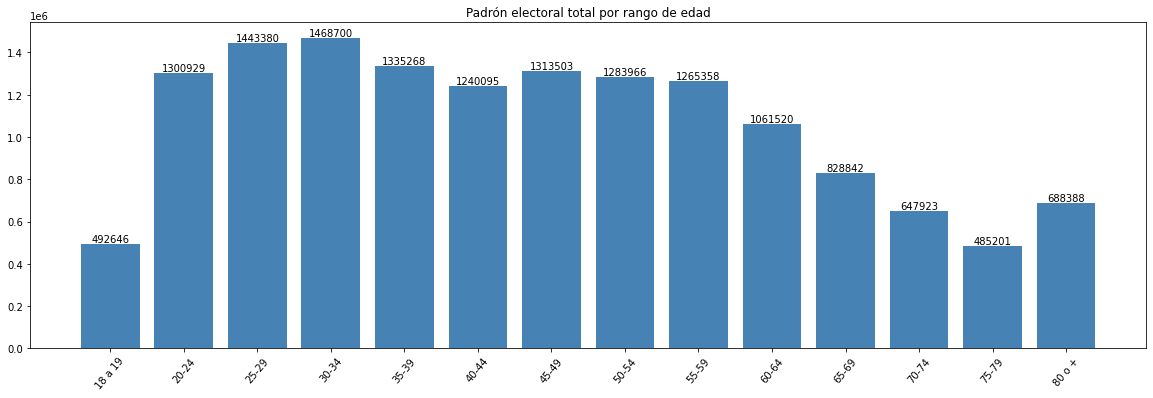

In [7]:
#mostramos el padrón electoral por randgo de edad
plt.bar(df_padron_rango_edad['Rango Edad'],df_padron_rango_edad['Cedula'],
       color='steelblue')

plt.title('Padrón electoral total por rango de edad')
plt.xticks(rotation=50)

         
for i,txt in enumerate(df_padron_rango_edad['Cedula']):
    plt.annotate(txt,(df_padron_rango_edad['Rango Edad'][i],df_padron_rango_edad['Cedula'][i]),
                 horizontalalignment= 'center',
                verticalalignment='bottom')            

plt.rcParams["figure.figsize"] = (20, 6)  
plt.show()

In [8]:
#creando dataframe para padrón electoral por partido
df_padron_partido = df_datos.groupby('Partido').count()['Cedula'].reset_index()

df_padron_partido['militantes']=df_padron_partido['Cedula']


df_padron_partido = df_padron_partido.drop(['Cedula'], axis=1)

In [9]:
#detalle de partidos con su posición política
df_pp = pd.read_csv('./../Datos/pp.csv')

In [10]:
df_padron_partido = df_padron_partido.merge(df_pp, how = 'left', left_on='Partido', right_on='Partido').fillna(0)

In [162]:
#mostramos los 10 partidos con mayor cantidad de militantes y su posición política
df_padron_partido.iloc[1:].sort_values('militantes',ascending=False).head(10)

,Partido,militantes,posicion
32,[5] SOCIALISTA DE CHILE,121755,Centro Izquierda
31,[4] POR LA DEMOCRACIA,110191,Centro Izquierda
27,[2] PARTIDO DEMOCRATA CRISTIANO,106228,Centro Izquierda
29,[3] UNION DEMOCRATA INDEPENDIENTE,99195,Derecha
33,[6] COMUNISTA DE CHILE,83424,Izquierda
6,[139] PARTIDO PROGRESISTA DE CHILE,60723,Centro Izquierda
26,[1] RENOVACION NACIONAL,41417,Centro Derecha
30,[45] REVOLUCION DEMOCRATICA,36757,Centro Izquierda
34,[7] RADICAL DE CHILE,30138,Centro
7,[140] REGIONALISTA INDEPENDIENTE DEMOCRATA,23334,Centro


In [12]:
#nos quedamos unicamente con la cantidad de militantes por partido, excluyendo a quienes no militan en ningún partido
df_militantes_pp = df_padron_partido.iloc[1:]

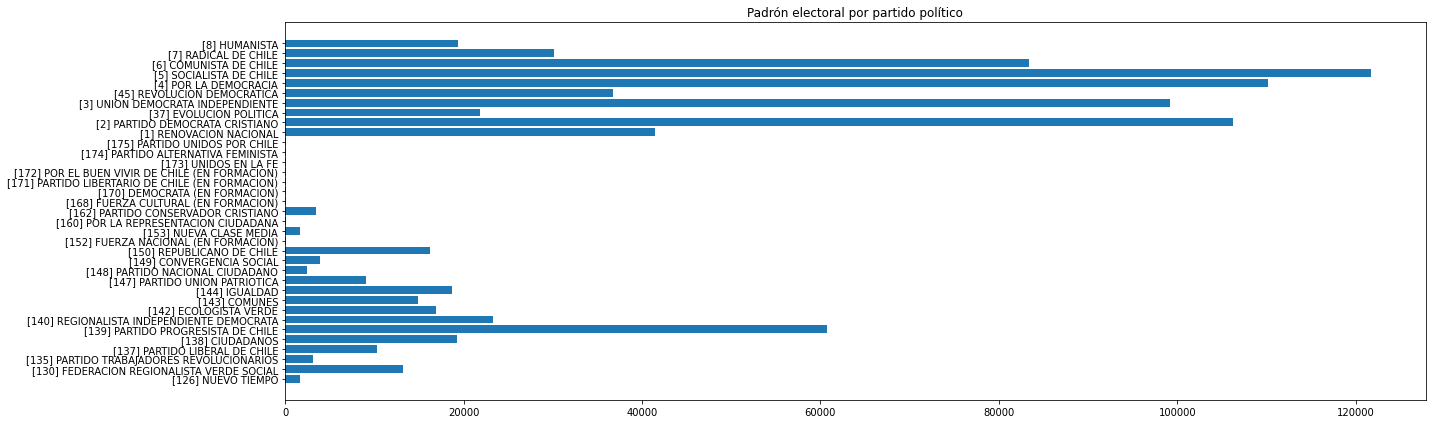

In [13]:
#Mostramos el padrón electoral de los militantes por partido político
plt.barh(df_militantes_pp['Partido'],df_militantes_pp['militantes'])

plt.rcParams["figure.figsize"] = (20, 6)  

plt.title('Padrón electoral por partido político')

plt.tight_layout() 
plt.show()

In [14]:
#dataframe inicial para el % de la participación por region
df_participacion_reg = df_datos.groupby('Region').count()[['Cedula','Votaron']].reset_index()
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_reg['participacion'] = np.round(df_participacion_reg['Votaron']*100/df_participacion_reg['Cedula'],2)
df_participacion_reg['sin_participacion'] = 100-df_participacion_reg['participacion']

In [15]:
df_participacion_reg

,Region,Cedula,Votaron,participacion,sin_participacion
0,De Antofagasta,477718,233272,48.83,51.17
1,De Arica Y Parinacota,191498,86464,45.15,54.85
2,De Atacama,240766,115768,48.08,51.92
3,De Aysen Del General Carlos Ibañez Del Campo,97438,38400,39.41,60.59
4,De Coquimbo,606408,288530,47.58,52.42
5,De La Araucania,874304,350588,40.10,59.90
6,De Los Lagos,731424,313603,42.88,57.12
7,De Los Rios,346845,155705,44.89,55.11
8,De Magallanes Y De La Antartica Chilena,159618,65846,41.25,58.75
9,De Tarapaca,257520,115951,45.03,54.97


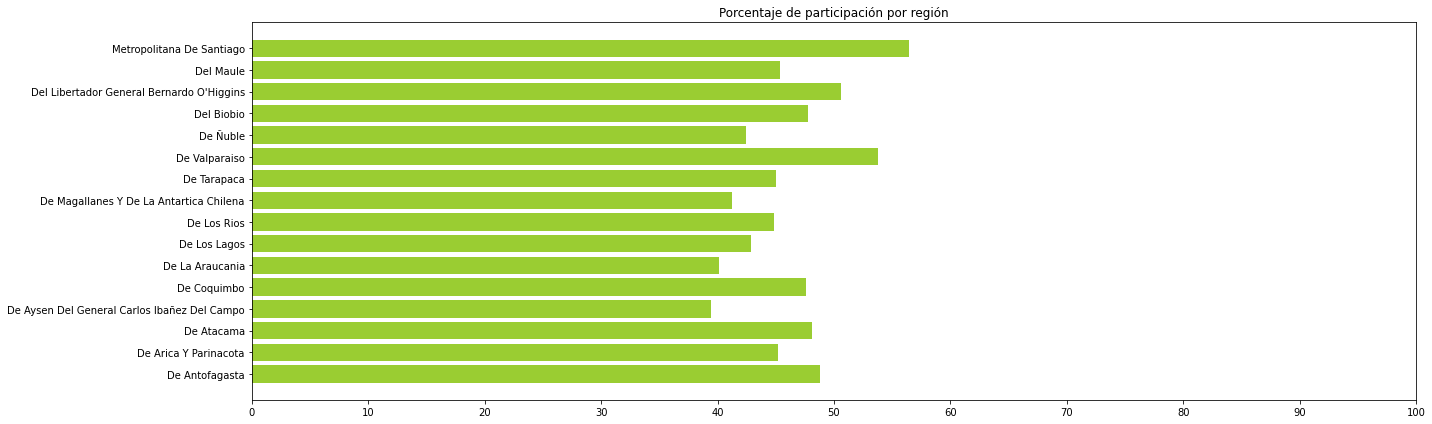

In [16]:
#mostramos el porcentaje de participación por región
plt.barh(df_participacion_reg['Region'],df_participacion_reg['participacion'],
         color='yellowgreen')

plt.rcParams["figure.figsize"] = (15, 6)  



#plt.yticks(rotation=50)    

plt.title('Porcentaje de participación por región')
plt.xticks(np.arange(0,110,10))

plt.tight_layout() 
plt.show()

In [126]:
#cuales fueron las 3 regiones con mayor participación?
df_participacion_reg[['Region','Cedula','participacion']].sort_values('participacion',ascending=False).head(10)

,Region,Cedula,participacion
15,Metropolitana De Santiago,5839397,56.47
10,De Valparaiso,1585206,53.78
13,Del Libertador General Bernardo O'Higgins,763106,50.60
0,De Antofagasta,477718,48.83
2,De Atacama,240766,48.08
12,Del Biobio,1325880,47.80
4,De Coquimbo,606408,47.58
14,Del Maule,875685,45.36
1,De Arica Y Parinacota,191498,45.15
9,De Tarapaca,257520,45.03


In [121]:
df_participacion_reg.head()

,Region,Cedula,Votaron,participacion,sin_participacion
0,De Antofagasta,477718,233272,48.83,51.17
1,De Arica Y Parinacota,191498,86464,45.15,54.85
2,De Atacama,240766,115768,48.08,51.92
3,De Aysen Del General Carlos Ibañez Del Campo,97438,38400,39.41,60.59
4,De Coquimbo,606408,288530,47.58,52.42


In [123]:
#cuales fueron las 5 regiones con menor participación?
df_participacion_reg[['Region','Cedula']].sort_values('Cedula',ascending=False).head(5)

,Region,Cedula
15,Metropolitana De Santiago,5839397
10,De Valparaiso,1585206
12,Del Biobio,1325880
14,Del Maule,875685
5,De La Araucania,874304


In [128]:
#cuales fueron las 3 regiones con menor participación?
df_participacion_reg[['Region','Cedula','participacion']].sort_values('participacion',ascending=True).head(10)

,Region,Cedula,participacion
3,De Aysen Del General Carlos Ibañez Del Campo,97438,39.41
5,De La Araucania,874304,40.10
8,De Magallanes Y De La Antartica Chilena,159618,41.25
11,De Ñuble,423384,42.47
6,De Los Lagos,731424,42.88
7,De Los Rios,346845,44.89
9,De Tarapaca,257520,45.03
1,De Arica Y Parinacota,191498,45.15
14,Del Maule,875685,45.36
4,De Coquimbo,606408,47.58


Dentro de las regiones con participación mas alta las 3 primeras pertencen a la parte mas centríca del país
como se distribuyo la participación por comuna en cada una de estas regiones? 

In [19]:
#cargando datos geojson para la Región metropolitana
map_data_rm = gpd.read_file('./../Datos/RM_all.geojson')

In [20]:
#creando data frame de región metropolitana
df_rm = df_datos[df_datos['Region'] == 'Metropolitana De Santiago']

In [21]:
#normalizando algunos nombres de comunas
comunas_to_replace = ['Maria Pinto', 'San Joaquin', 'San Ramon', 'Isla De Maipo',
                     'San Jose De Maipo', 'Alhue', 'Curacavi', 'Calera De Tango',
                     'Conchali', 'Peñalolen', 'Maipu', 'Estacion Central']
comunas_new_value = ['María Pinto', 'San Joaquín', 'San Ramón', 'Isla de Maipo',
                    'San José de Maipo', 'Alhué', 'Curacaví', 'Calera de Tango',
                     'Conchalí', 'Peñalolén', 'Maipú', 'Estación Central']

df_rm = df_rm.replace(to_replace = comunas_to_replace,
                                  value = comunas_new_value)

In [22]:
rm_comuna_count = df_rm.groupby(['Comuna']).count()[['Cedula','Votaron']].reset_index()

In [44]:
rm_comuna_part = map_data_rm.merge(rm_comuna_count, how = 'left', left_on='NOM_COM', right_on='Comuna').fillna(0)
#agregamos el % de participación como columna a nuestro dataframe
rm_comuna_part['participacion'] = np.round(rm_comuna_part['Votaron']*100/rm_comuna_part['Cedula'],2)

In [94]:
#Comunas de la región con mayor participación
rm_comuna_part[['Comuna','participacion']].sort_values('participacion',ascending=False).head(3)

,Comuna,participacion
4,Lo Barnechea,67.77
34,Vitacura,67.76
45,La Reina,64.12


[]

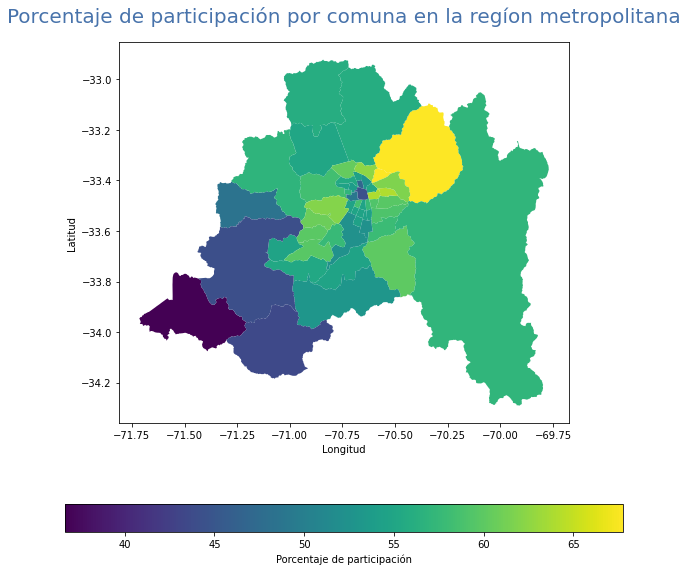

In [26]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Porcentaje de participación por comuna en la regíon metropolitana', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Control del encuadre (área geográfica) del mapa
# ax.axis([-12, 5, 32, 48])

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
rm_comuna_part.plot(column='participacion',
              ax=ax, zorder=5, 
              legend=True,
              legend_kwds={'label':'Porcentaje de participación',
                            'orientation':'horizontal'},
              )
plt.plot()

In [27]:
#creando data frame de región de valparaiso
df_valpo = df_datos[df_datos['Region'] == 'De Valparaiso']

In [28]:
#cargando datos geojson para la Región de valparaíso
map_data_valpo = gpd.read_file('./../Datos/VALPO_all.geojson')

In [33]:
#normalizando algunos nombres de comunas
comunas_to_replace = ['Valparaiso', 'Concon', 'Santa Maria', 'Puchuncavi',
                     'Olmue', 'Quilpue','Juan Fernandez' ]
comunas_new_value = ['Valparaíso', 'Concón', 'Santa María', 'Puchuncaví',
                     'Olmué', 'Quilpué', 'Juan Fernández']

df_valpo = df_valpo.replace(to_replace = comunas_to_replace,
                                  value = comunas_new_value)

In [39]:
valpo_comuna_count = df_valpo.groupby(['Comuna']).count()[['Cedula','Votaron']].reset_index()


In [40]:
valpo_comuna_part = map_data_valpo.merge(valpo_comuna_count, how = 'left', left_on='NOM_COM', right_on='Comuna').fillna(0)
#agregamos el % de participación como columna a nuestro dataframe
valpo_comuna_part['participacion'] = np.round(valpo_comuna_count['Votaron']*100/valpo_comuna_count['Cedula'],2)

In [93]:
#Comunas de la región con mayor participación
valpo_comuna_part[['Comuna','participacion']].query("Comuna != 0").sort_values('participacion',ascending=False).head(3)

,Comuna,participacion
7,Petorca,63.78
21,Putaendo,62.01
37,Juan Fernández,61.73


[]

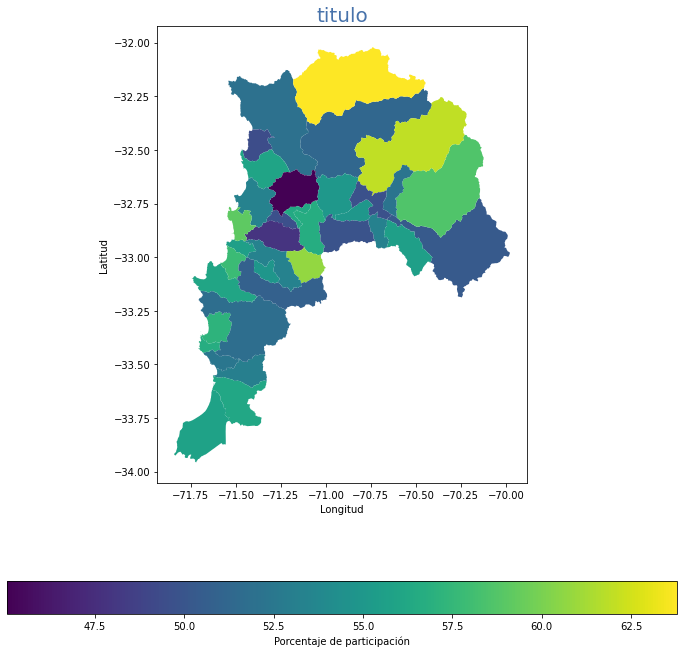

In [71]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(12, 12))
 
# Control del título y los ejes
ax.set_title('titulo', 
             pad =5, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Control del encuadre (área geográfica) del mapa
#ax.axis([-120, -70, 30, 20])

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
valpo_comuna_part.plot(column='participacion',
              ax=ax, zorder=5, 
              legend=True,
              legend_kwds={'label':'Porcentaje de participación',
                            'orientation':'horizontal'},
              )
plt.plot()

In [75]:
#creando data frame de región de valparaiso
df_ohi = df_datos[df_datos['Region'] == "Del Libertador General Bernardo O'Higgins"]

In [78]:
#cargando datos geojson para la Región de Ohiggins
map_data_ohi = gpd.read_file('./../Datos/OHI_all.geojson')

In [85]:
comunas_to_replace = ['Machali', 'Requinoa', 'Marchigue', 'Chepica']
comunas_new_value = ['Machalí','Requínoa', 'Marchigüe', 'Chépica']

df_ohi = df_ohi.replace(to_replace = comunas_to_replace,
                                  value = comunas_new_value)

In [87]:
ohi_comuna_count = df_ohi.groupby(['Comuna']).count()[['Cedula','Votaron']].reset_index()

In [89]:
ohi_comuna_part = map_data_ohi.merge(ohi_comuna_count, how = 'left', left_on='NOM_COM', right_on='Comuna').fillna(0)
#agregamos el % de participación como columna a nuestro dataframe
ohi_comuna_part['participacion'] = np.round(ohi_comuna_count['Votaron']*100/ohi_comuna_count['Cedula'],2)

In [92]:
#Comunas de la región con mayor participación
ohi_comuna_part[['Comuna','participacion']].query("Comuna != 0").sort_values('participacion',ascending=False).head(3)

,Comuna,participacion
11,Requínoa,58.58
6,Peumo,57.43
14,La Estrella,55.33


[]

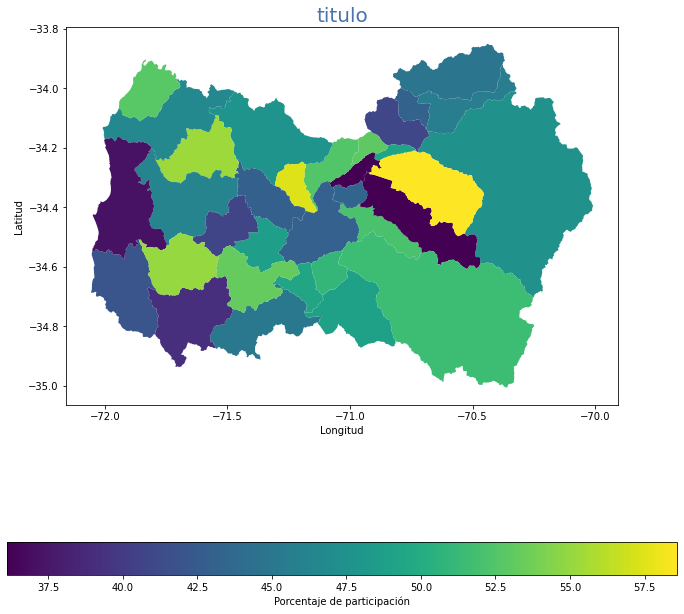

In [95]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(12, 12))
 
# Control del título y los ejes
ax.set_title('titulo', 
             pad =5, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Control del encuadre (área geográfica) del mapa
#ax.axis([-120, -70, 30, 20])

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
ohi_comuna_part.plot(column='participacion',
              ax=ax, zorder=5, 
              legend=True,
              legend_kwds={'label':'Porcentaje de participación',
                            'orientation':'horizontal'},
              )
plt.plot()

In [96]:
#Dentro de las regiones con participación mas baja las 3 primeras pertencen a la parte mas extrema del país
#como se distribuyo la participación por comuna en cada una de estas regiones? 

In [97]:
#creando data frame de región de valparaiso
df_ays = df_datos[df_datos['Region'] == "De Aysen Del General Carlos Ibañez Del Campo"]

In [98]:
#cargando datos geojson para la Región de Aysén
map_data_ays = gpd.read_file('./../Datos/AYS_all.geojson')

In [104]:
comunas_to_replace = ['Rio Ibañez', 'Aysen']
comunas_new_value = ['Río Ibáñez', 'Aysén']

df_ays = df_ays.replace(to_replace = comunas_to_replace,
                                  value = comunas_new_value)

In [105]:
ays_comuna_count = df_ays.groupby(['Comuna']).count()[['Cedula','Votaron']].reset_index()

In [129]:
ays_comuna_part = map_data_ays.merge(ays_comuna_count, how = 'left', left_on='NOM_COM', right_on='Comuna').fillna(0)
#agregamos el % de participación como columna a nuestro dataframe
ays_comuna_part['participacion'] = np.round(ays_comuna_count['Votaron']*100/ays_comuna_count['Cedula'],2)

In [130]:
#Comunas de la región con mayor participación
ays_comuna_part[['Comuna','participacion']].query("Comuna != 0").sort_values('participacion',ascending=False).head(3)

,Comuna,participacion
4,Tortel,41.69
0,O'Higgins,40.00
2,Chile Chico,38.76


[]

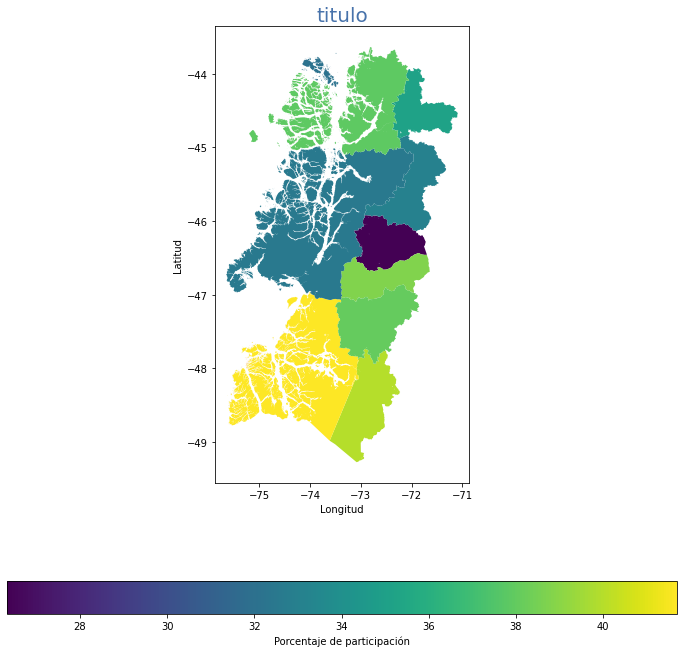

In [111]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(12, 12))
 
# Control del título y los ejes
ax.set_title('titulo', 
             pad =5, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Control del encuadre (área geográfica) del mapa
#ax.axis([-120, -70, 30, 20])

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
ohi_comuna_part.plot(column='participacion',
              ax=ax, zorder=5, 
              legend=True,
              legend_kwds={'label':'Porcentaje de participación',
                            'orientation':'horizontal'},
              )
plt.plot()

In [147]:
#dataframe inicial para el % de la participación por partido político
df_participacion_pp = df_datos.groupby('Partido').count()[['Cedula','Votaron']].reset_index()
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_pp['participacion'] = np.round(df_participacion_pp['Votaron']*100/df_participacion_pp['Cedula'],2)
df_participacion_pp['sin_participacion'] = 100-df_participacion_pp['participacion']

In [148]:
df_participacion_pp = df_participacion_pp.merge(df_pp, how = 'left', left_on='Partido', right_on='Partido').fillna(0)

In [150]:
df_posicion_politica = df_participacion_pp.groupby(['posicion']).sum()[['Cedula','Votaron']].reset_index()

#agregamos el % de participación como columna a nuestro dataframe
df_posicion_politica['participacion'] = np.round(df_posicion_politica['Votaron']*100/df_posicion_politica['Cedula'],2)
df_posicion_politica['sin_participacion'] = 100-df_posicion_politica['participacion']

In [151]:
df_posicion_politica

,posicion,Cedula,Votaron,participacion,sin_participacion
0,Centro,55185,32002,57.99,42.01
1,Centro Derecha,63276,40834,64.53,35.47
2,Centro Izquierda,465198,303193,65.18,34.82
3,Derecha,102640,58315,56.82,43.18
4,Extrema Derecha,20438,15753,77.08,22.92
5,Extrema Izquierda,27024,17784,65.81,34.19
6,Izquierda,155456,103044,66.28,33.72
7,Sin informaci�n,1050,784,74.67,25.33
8,no es militante,13965452,6970350,49.91,50.09


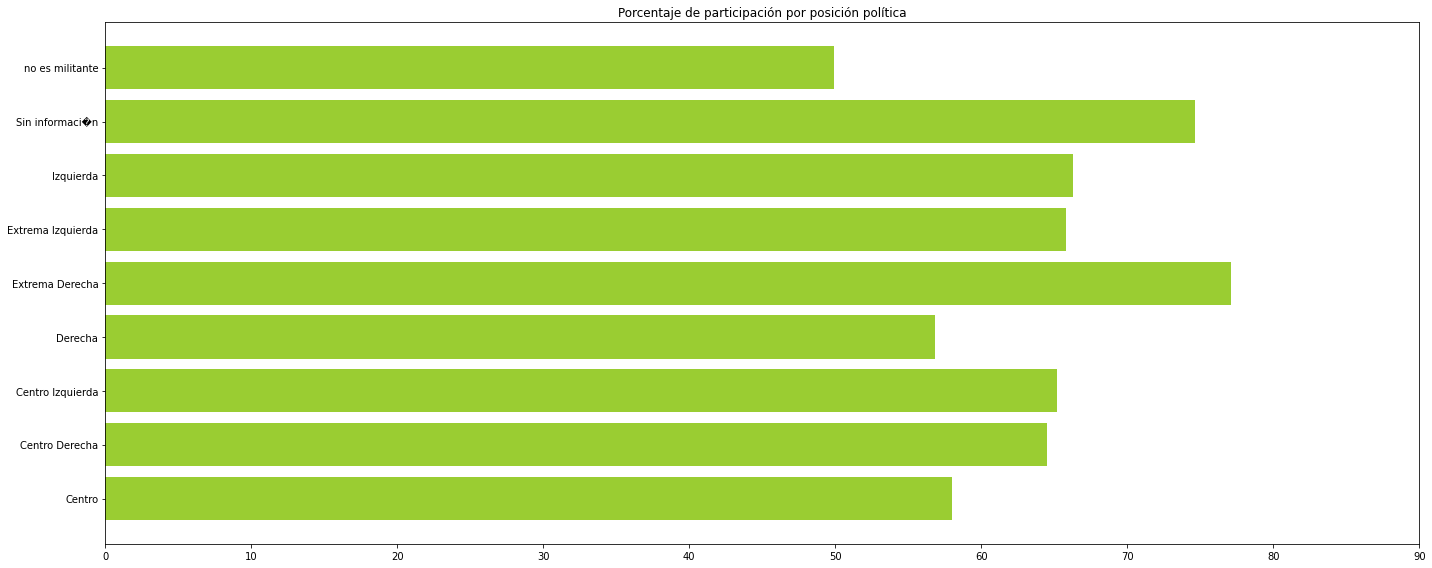

In [159]:
#mostramos el porcentaje de participación por región
plt.barh(df_posicion_politica['posicion'],df_posicion_politica['participacion'],
         color='yellowgreen')

plt.rcParams["figure.figsize"] = (20,8)  

plt.title('Porcentaje de participación por posición política')
plt.xticks(np.arange(0,100,10))



plt.tight_layout() 
plt.show()

In [21]:
#dataframe inicial para el % de la participación por rango etario
df_participacion_edad = df_datos.groupby('Rango Edad').count()[['Cedula','Votaron']].reset_index()
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_edad['participacion'] = np.round(df_participacion_edad['Votaron']*100/df_participacion_edad['Cedula'],2)

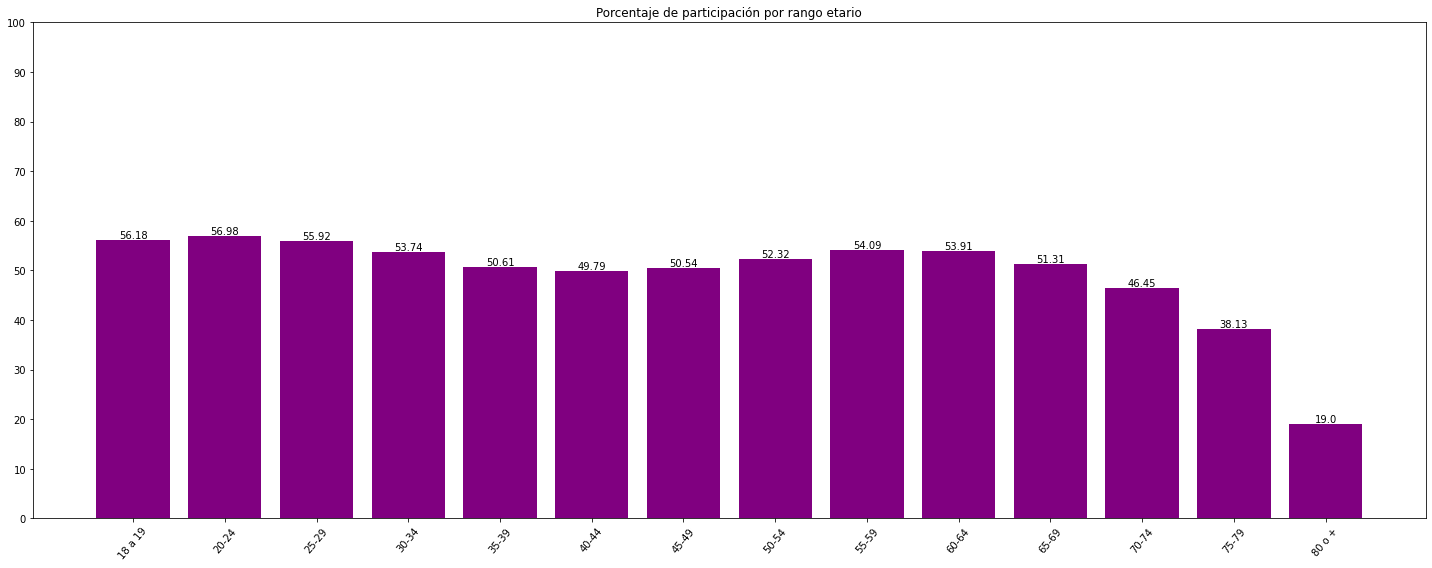

In [22]:
#mostramos el porcentaje de participación por rango etario
plt.bar(df_participacion_edad['Rango Edad'],df_participacion_edad['participacion'],
         color='purple')

plt.rcParams["figure.figsize"] = (20, 6)  



plt.xticks(rotation=50)    

plt.title('Porcentaje de participación por rango etario')
plt.yticks(np.arange(0,110,10))


for i,txt in enumerate(df_participacion_edad['participacion']):
    plt.annotate(txt,(df_participacion_edad['Rango Edad'][i],df_participacion_edad['participacion'][i]),
                 horizontalalignment= 'center',
                verticalalignment='bottom') 

plt.tight_layout() 
plt.show()

In [23]:
#dataframe inicial para el % de la participación por genero
df_participacion_gen = df_datos.groupby('Sexo').count()[['Cedula','Votaron']].reset_index()

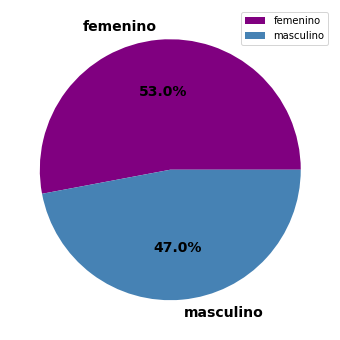

In [24]:
#mostramos el porcentaje de votación por genero
plt.pie(df_participacion_gen['Votaron'],
       labels=df_participacion_gen['Sexo'],
       autopct='%1.1f%%',
       colors=['purple','steelblue'],
       textprops=dict(weight='bold',size=14))

plt.legend()
plt.show()

In [25]:
#dataframe inicial para el % de la participación dentro y fuera de chile
df_participacion_ext = df_datos.groupby('VotoExterior').count()[['Cedula','Votaron']].reset_index()

In [26]:
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_ext['participacion'] = np.round(df_participacion_ext['Votaron']*100/df_participacion_ext['Cedula'],2)

In [27]:
df_participacion_ext

,VotoExterior,Cedula,Votaron,participacion
0,Exterior,59522,30936,51.97
1,Nacional,14796197,7511123,50.76


In [241]:
df_datos.head(2)

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron
0,0,Coyhaique,Coyhaique,0,22,chilena,Chile,Chile,[130] FEDERACION REGIONALISTA VERDE SOCIAL,Coyhaique,20-24,De Aysen Del General Carlos Ibañez Del Campo,femenino,sufragó,Nacional,1,1.0
1,0,El Puerto,Valparaiso,0,89,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,femenino,no sufragó,Nacional,1,NaN


In [243]:
df_edades_af_p = df_datos.groupby(['Rango Edad','Edad','Partido']).count()[['Cedula','Votaron']].reset_index()

In [244]:
cond1 = df_edades_af_p['Edad'] < 64
cond2 = df_edades_af_p['Edad'] >= 50
cond3 = df_edades_af_p['Edad'] < 30


In [245]:
df_menores = df_edades_af_p[cond3]
df_mayores = df_edades_af_p[cond2 & cond1]

In [246]:
frames = [df_menores,df_mayores]

In [255]:
df_edades_af_p = pd.concat(frames)
df_edades_af_p = df_edades_af_p.groupby(['Rango Edad','Partido']).sum()[['Cedula','Votaron']].reset_index()
df_edades_af_p

,Rango Edad,Partido,Cedula,Votaron
0,18 a 19,SIN PARTIDO,489354,274514
1,18 a 19,[126] NUEVO TIEMPO,3,2
2,18 a 19,[130] FEDERACION REGIONALISTA VERDE SOCIAL,628,417
3,18 a 19,[135] PARTIDO TRABAJADORES REVOLUCIONARIOS,26,16
4,18 a 19,[137] PARTIDO LIBERAL DE CHILE,915,643
...,...,...,...,...
209,60-64,[4] POR LA DEMOCRACIA,11852,7891
210,60-64,[5] SOCIALISTA DE CHILE,11500,7928
211,60-64,[6] COMUNISTA DE CHILE,8277,6067
212,60-64,[7] RADICAL DE CHILE,2165,1503


In [256]:
#crear columnas condicionalmente
condiciones = [
    (df_edades_af_p['Partido']  == 'SIN PARTIDO'),
    (df_edades_af_p['Partido']  != 'SIN PARTIDO')
]


opciones = ['no','si']

#incluir condiciones y opciones
df_edades_af_p['interes partido'] = np.select(condiciones ,opciones)

In [261]:
df_edades_af_p = df_edades_af_p.groupby(['Rango Edad','interes partido']).sum()[['Cedula','Votaron']].reset_index()

In [265]:
 conteo_si = df_edades_af_p[df_edades_af_p['interes partido']=='si']

In [270]:
 conteo_no = df_edades_af_p[df_edades_af_p['interes partido']=='no']

In [271]:
df_edades_af_p

,Rango Edad,interes partido,Cedula,Votaron
0,18 a 19,no,489354,274514
1,18 a 19,si,3292,2276
2,20-24,no,1228294,693248
3,20-24,si,72635,48036
4,25-29,no,1362507,754471
5,25-29,si,80873,52696
6,50-54,no,1186222,607764
7,50-54,si,97744,64026
8,55-59,no,1164217,616464
9,55-59,si,101141,67955


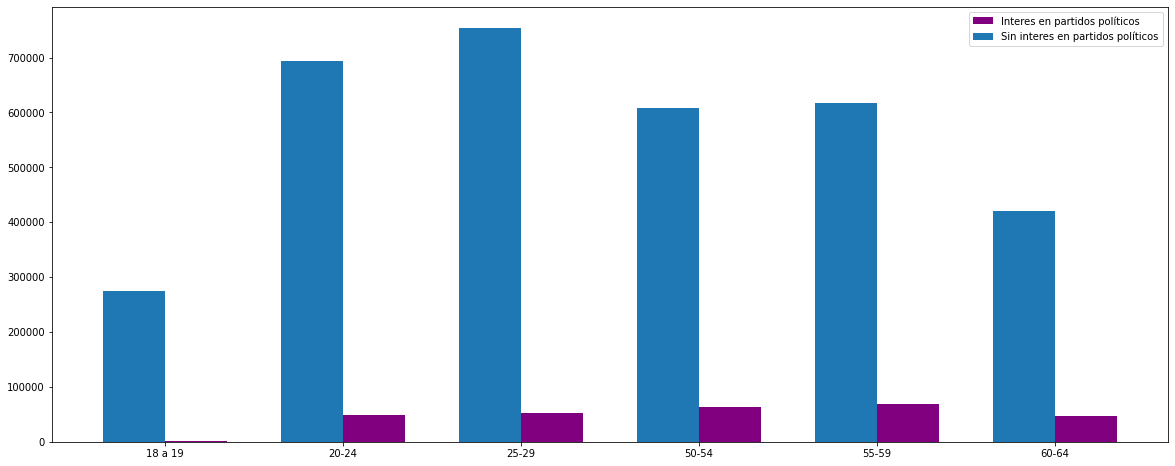

In [281]:
# los mayores porcentajes de participación por rango etario (entre los 18 y 29 años para la población menor,entre los 50 y 64 los mayores) 
# sienten interes por los partidos políticos?

width = 0.35
labels = conteo_si['Rango Edad']
x = np.arange(len(labels))


plt.bar(x + width/2,conteo_si['Votaron'],width,label='Interes en partidos políticos',color='purple')
plt.bar(x - width/2,conteo_no['Votaron'],width,label='Sin interes en partidos políticos')


plt.xticks(x,labels)

plt.legend()

plt.show()

In [282]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'